# Examples on simulated data

## Prep

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

import sys,os
os.chdir('..') #change working directory

In [2]:
from data_simulation import *

## Spiral

  -- loading checkerboard data


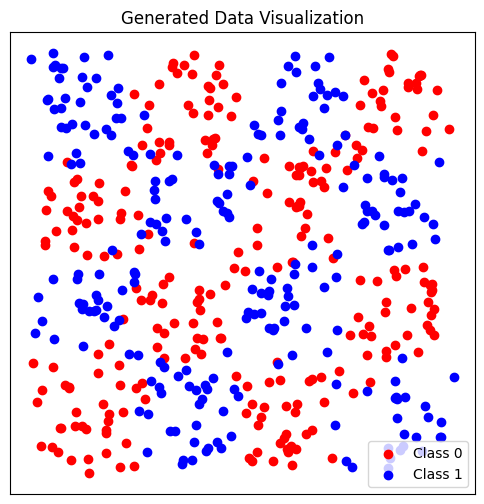

In [4]:
X, y = generate_data(choice='checkerboard', n_samples=500, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### our lib

In [ ]:
from tensor import Tensor
from dataset import TensorDataset
from module import Module
from linear import Linear
from activation import ReLU
from loss import CrossEntropyLoss,MSE
from optimizer import SGD
from transforms import Standardize, ToTensor, Compose

# -- testing if it workd on ndarray
# training_data=Tensor(X_train)
# training_labels=Tensor(y_train)
# test_data=Tensor(X_test)
# test_labels=Tensor(y_test)

transformation=Compose([ToTensor(), Standardize()])

train_dataset = TensorDataset(X_train, y_train, transform=transformation)
test_dataset = TensorDataset(X_test, y_test, transform=transformation)

print(f'train dataset of length {len(train_dataset)} and shape {train_dataset[0][0].shape}; labels shape {train_dataset[0][1].shape}')
print(f'test dataset of length {len(test_dataset)} and shape {test_dataset[0][0].shape}; labels shape {test_dataset[0][1].shape}')

print()

from dataloader import DataLoader
train_loader=DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader=DataLoader(test_dataset, batch_size=32, shuffle=True)

for batch,(x,y) in enumerate(train_loader):
    print(f'batch {batch} data shape {x.shape}; labels shape {y.shape}')

In [ ]:
[np.arange(y.data.size),y.data]

In [ ]:
class SimpleNN(Module):
    def __init__(self):
        super().__init__()
        self.fc1=Linear(2, 5)
        self.fc2=Linear(5, 1)
        self.relu=ReLU()

    def forward(self, x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        return x
    
model = SimpleNN()
optimizer = SGD(model.parameters(), lr=0.1, momentum=0.9)
loss_fn = MSE()

# -- training
for epoch in range(10):
    for batch_no,(x, y) in enumerate(train_loader):
        x.flatten_batch()
        optimizer.zero_grad()
        y_hat = model(x)
        loss = loss_fn(y, y_hat)
        loss.backward()
        optimizer.step()
        

    print(f'iteration: {epoch}')    
    print(f'Loss: {loss.data}') 
    predictions = np.argmax(y_hat.data, axis=0)
    accuracy = np.sum(predictions == y.data) / y.data.size
    print(predictions, y.data)
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print('------------------')